In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [104]:
sales = pd.read_csv('data/sales_data.csv', parse_dates = ['Date'])

sales.head() #show top few rows
sales.shape #show rows and column
sales.info() #show data type and category
sales.describe() #show simple stats of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


<AxesSubplot:>

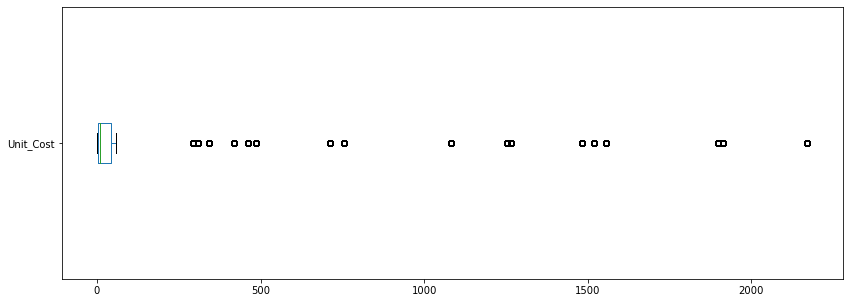

In [27]:
sales['Unit_Cost'].plot(kind='box', vert=False, figsize=(14,5))

<AxesSubplot:ylabel='Density'>

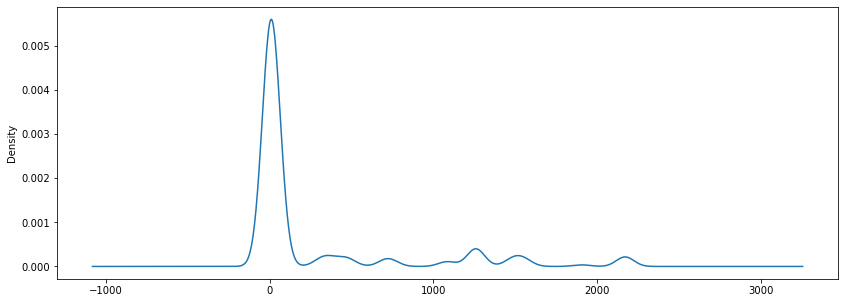

In [33]:
sales['Unit_Cost'].plot(kind='density', figsize=(14,5))

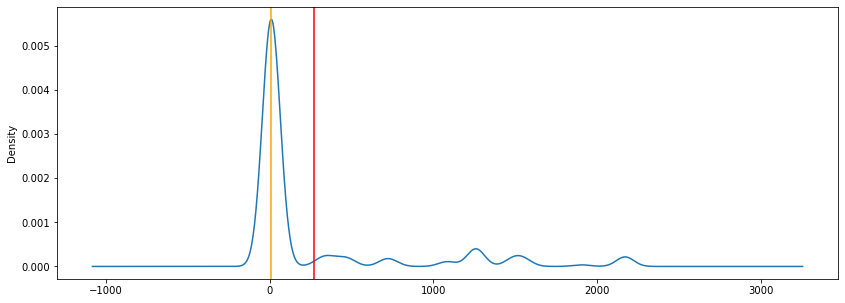

In [40]:
ax = sales['Unit_Cost'].plot(kind='density', figsize=(14,5))
ax.axvline(sales.Unit_Cost.mean(), color='red')
ax.axvline(sales.Unit_Cost.median(), color='orange')

Text(0, 0.5, 'Number of Sales')

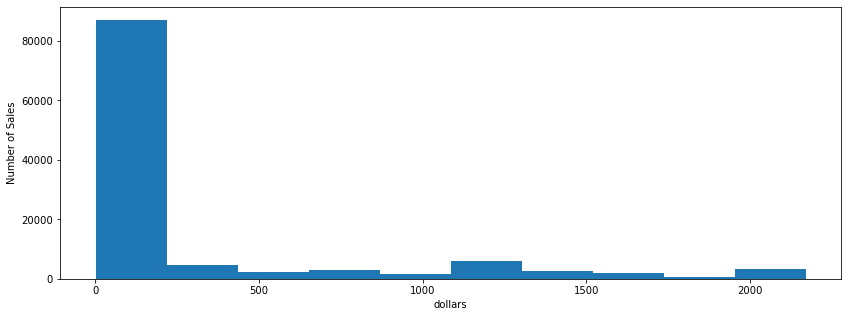

In [43]:
ax = sales['Unit_Cost'].plot(kind='hist', figsize=(14,5))
ax.set_xlabel('dollars')
ax.set_ylabel('Number of Sales')

In [46]:
sales.Age_Group.value_counts()

Adults (35-64)          55824
Young Adults (25-34)    38654
Youth (<25)             17828
Seniors (64+)             730
Name: Age_Group, dtype: int64

<AxesSubplot:ylabel='Age_Group'>

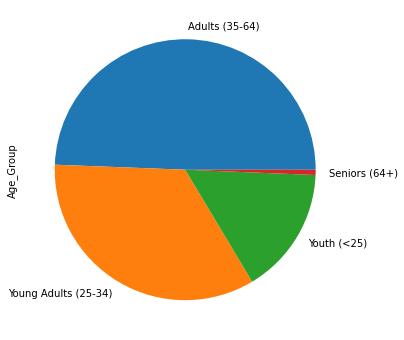

In [49]:
sales.Age_Group.value_counts().plot(kind='pie',figsize=(6,6))

<AxesSubplot:>

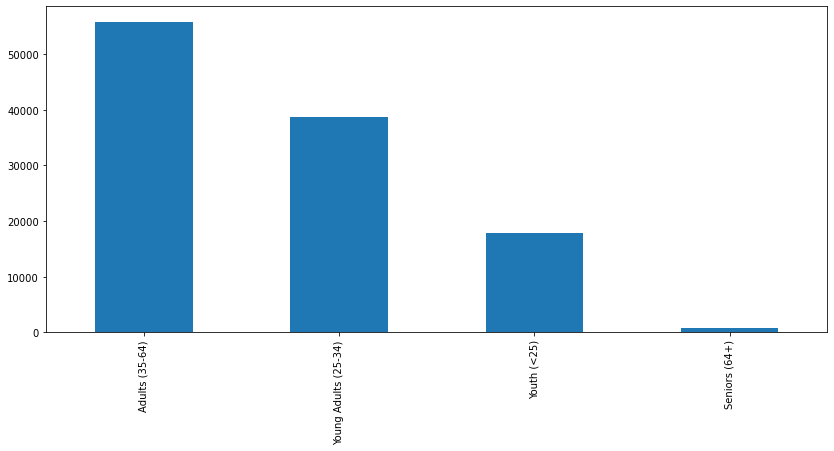

In [52]:
sales.Age_Group.value_counts().plot(kind='bar',figsize=(14,6))

In [56]:
corr = sales.corr()
corr

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Day,1.000000,-0.007635,-0.014296,-0.002412,0.003133,0.003207,0.004623,0.003329,0.003853
Year,-0.007635,1.000000,0.040994,0.123169,-0.217575,-0.213673,-0.181525,-0.215604,-0.208673
Customer_Age,-0.014296,0.040994,1.000000,0.026887,-0.021374,-0.020262,0.004319,-0.016013,-0.009326
Order_Quantity,-0.002412,0.123169,0.026887,1.000000,-0.515835,-0.515925,-0.238863,-0.340382,-0.312895
Unit_Cost,0.003133,-0.217575,-0.021374,-0.515835,1.000000,0.997894,0.741020,0.829869,0.817865
Unit_Price,0.003207,-0.213673,-0.020262,-0.515925,0.997894,1.000000,0.749870,0.826301,0.818522
Profit,0.004623,-0.181525,0.004319,-0.238863,0.741020,0.749870,1.000000,0.902233,0.956572
Cost,0.003329,-0.215604,-0.016013,-0.340382,0.829869,0.826301,0.902233,1.000000,0.988758
Revenue,0.003853,-0.208673,-0.009326,-0.312895,0.817865,0.818522,0.956572,0.988758,1.000000


([<matplotlib.axis.YTick at 0x2396f1470d0>,
 [Text(0, 0, 'Day'),
  Text(0, 1, 'Year'),
  Text(0, 2, 'Customer_Age'),
  Text(0, 3, 'Order_Quantity'),
  Text(0, 4, 'Unit_Cost'),
  Text(0, 5, 'Unit_Price'),
  Text(0, 6, 'Profit'),
  Text(0, 7, 'Cost'),
  Text(0, 8, 'Revenue')])

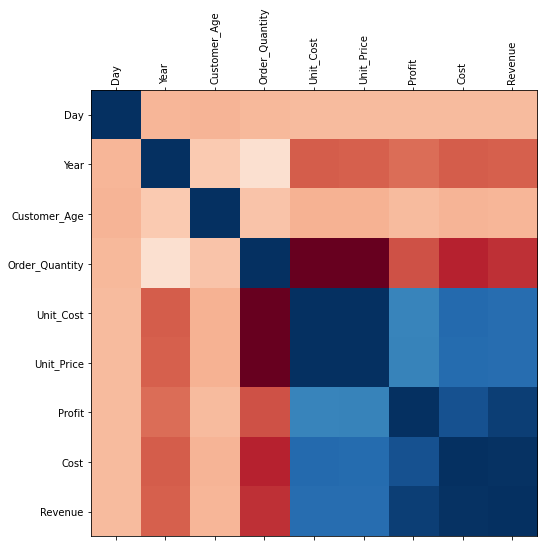

In [63]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)

<AxesSubplot:xlabel='Revenue', ylabel='Profit'>

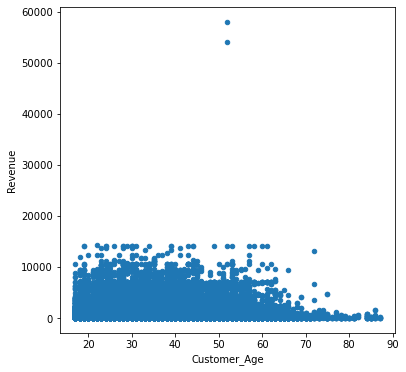

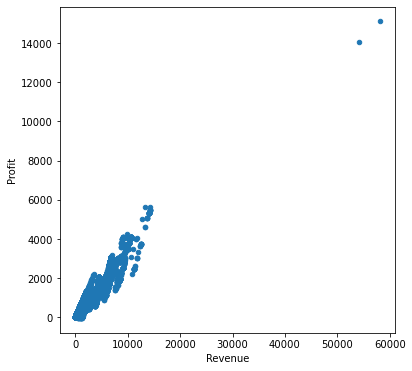

In [69]:
sales.plot(kind='scatter', x='Customer_Age', y='Revenue',figsize=(6,6))
sales.plot(kind='scatter', x='Revenue', y='Profit',figsize=(6,6))

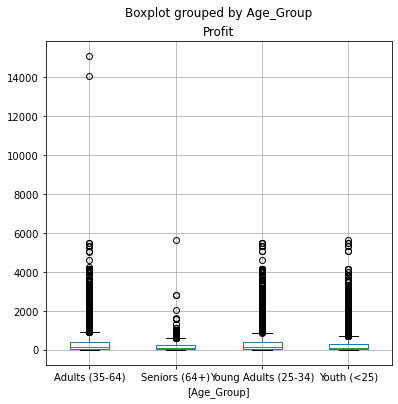

In [72]:
ax = sales[['Profit', 'Age_Group']].boxplot(by='Age_Group', figsize=(6,6))

Year                 AxesSubplot(0.125,0.536818;0.227941x0.343182)
Customer_Age      AxesSubplot(0.398529,0.536818;0.227941x0.343182)
Order_Quantity    AxesSubplot(0.672059,0.536818;0.227941x0.343182)
Unit_Cost               AxesSubplot(0.125,0.125;0.227941x0.343182)
Unit_Price           AxesSubplot(0.398529,0.125;0.227941x0.343182)
Profit               AxesSubplot(0.672059,0.125;0.227941x0.343182)
dtype: object

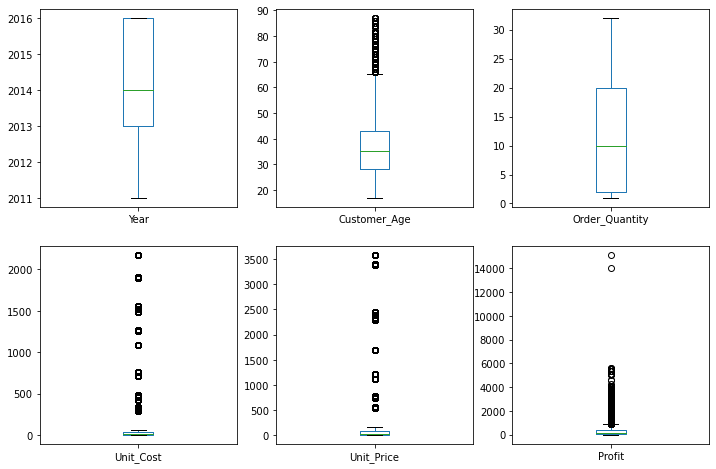

In [82]:
boxplot_cols = ['Year', 'Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit']
sales[boxplot_cols].plot(kind='box', subplots=True, layout=(2,3), figsize=(12,8))

<AxesSubplot:xlabel='Cal_Cost', ylabel='Profit'>

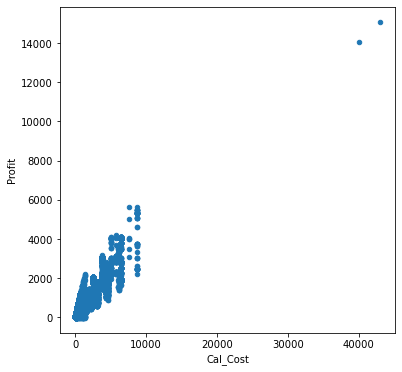

In [90]:
sales['Cal_Cost'] = sales['Order_Quantity'] * sales['Unit_Cost']
(sales['Cal_Cost'] != sales['Cost']).sum()
sales.plot(kind='scatter', x='Cal_Cost', y='Profit', figsize=(6,6))

In [96]:
sales.loc[sales['State'] == 'Kentucky']

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Total_Cost,Cal_Cost
156,2013-11-04,4,November,2013,40,Adults (35-64),M,United States,Kentucky,Accessories,Bike Racks,Hitch Rack - 4-Bike,1,45,120,63,45,108,45,45
157,2015-11-04,4,November,2015,40,Adults (35-64),M,United States,Kentucky,Accessories,Bike Racks,Hitch Rack - 4-Bike,1,45,120,63,45,108,45,45
23826,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,Fenders,Fender Set - Mountain,12,8,22,142,96,238,96,96
23827,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,Fenders,Fender Set - Mountain,14,8,22,165,112,277,112,112
31446,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,Helmets,"Sport-100 Helmet, Blue",29,13,35,537,377,914,377,377
31447,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,Helmets,"Sport-100 Helmet, Blue",31,13,35,574,403,977,403,403
79670,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,Tires and Tubes,ML Mountain Tire,2,11,30,32,22,54,22,22
79671,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,Tires and Tubes,ML Mountain Tire,21,11,30,336,231,567,231,231
79672,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,Tires and Tubes,ML Mountain Tire,1,11,30,16,11,27,11,11
79673,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,Tires and Tubes,ML Mountain Tire,18,11,30,288,198,486,198,198


In [101]:
sales.loc[(sales['Age_Group'] == 'Youth (<25)') | (sales['Age_Group'] == 'Adults (35-64)')].shape
sales.loc[(sales['Age_Group'] == 'Youth (<25)') | (sales['Age_Group'] == 'Adults (35-64)'), 'Revenue'].mean()

737.3506761527182